In [2]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow.keras


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# conversione in float32 da int8 del dataset originale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalizzazione nell'intervallo [0, 1]
x_train /= 255
x_test /= 255

# one-hot encoding delle label
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape del dataset (era un array monodimensionale)
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

print(x_train.shape)

(60000, 28, 28, 1)


In [4]:
model = Sequential()

# C1 Convolutional Layer
model.add(
    layers.Conv2D(
        6, 
        kernel_size=(5, 5), 
        strides=(1, 1), 
        activation='tanh', 
        input_shape=(28,28,1), 
        padding='same'
      )
  )

# S2 Pooling Layer
model.add(
    layers.AveragePooling2D(
        pool_size=(2, 2), 
        strides=(1, 1), 
        padding='valid'
        )
    )

# C3 Convolutional Layer
model.add(
    layers.Conv2D(
        16, 
        kernel_size=(5, 5), 
        strides=(1, 1), 
        activation='tanh', 
        padding='valid'
        )
    )

# S4 Pooling Layer
model.add(
    layers.AveragePooling2D(
        pool_size=(2, 2), 
        strides=(2, 2), 
        padding='valid'
        )
    )

# C5 Convolutional Layer
model.add(
    layers.Conv2D(
        120, 
        kernel_size=(5, 5), 
        strides=(1, 1), 
        activation='tanh', 
        padding='valid')
    )

# Appiattimento dei dati dei layer convolutivi per poterli usare nei seguenti layer pienamente connessi
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

# Output Layer con attivazione di tipo softmax 
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy']
    )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [5]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=2)

Epoch 1/10
469/469 - 5s - loss: 0.7134 - accuracy: 0.8116 - val_loss: 0.3447 - val_accuracy: 0.9046
Epoch 2/10
469/469 - 2s - loss: 0.3144 - accuracy: 0.9111 - val_loss: 0.2614 - val_accuracy: 0.9267
Epoch 3/10
469/469 - 2s - loss: 0.2536 - accuracy: 0.9275 - val_loss: 0.2199 - val_accuracy: 0.9391
Epoch 4/10
469/469 - 2s - loss: 0.2170 - accuracy: 0.9377 - val_loss: 0.1921 - val_accuracy: 0.9465
Epoch 5/10
469/469 - 2s - loss: 0.1902 - accuracy: 0.9454 - val_loss: 0.1702 - val_accuracy: 0.9532
Epoch 6/10
469/469 - 2s - loss: 0.1697 - accuracy: 0.9515 - val_loss: 0.1523 - val_accuracy: 0.9575
Epoch 7/10
469/469 - 2s - loss: 0.1527 - accuracy: 0.9570 - val_loss: 0.1387 - val_accuracy: 0.9611
Epoch 8/10
469/469 - 2s - loss: 0.1383 - accuracy: 0.9611 - val_loss: 0.1279 - val_accuracy: 0.9647
Epoch 9/10
469/469 - 2s - loss: 0.1264 - accuracy: 0.9646 - val_loss: 0.1174 - val_accuracy: 0.9680
Epoch 10/10
469/469 - 2s - loss: 0.1164 - accuracy: 0.9672 - val_loss: 0.1087 - val_accuracy: 0.9698

In [6]:
test_score = model.evaluate(x_test, y_test)
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1087 - accuracy: 0.9698
Test loss 0.1087, accuracy 96.98%


Text(0, 0.5, 'loss')

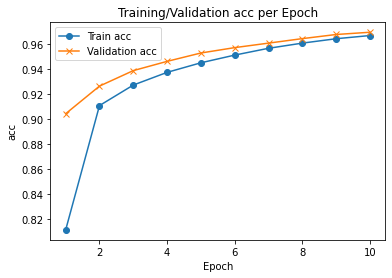

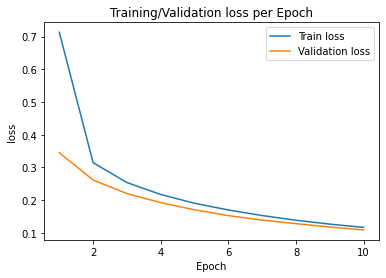

In [7]:
f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')

# disegno della legenda nella migliore posizione automaticamente: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

f2, ax2 = plt.subplots()
ax2.plot([None] + hist.history['loss'])
ax2.plot([None] + hist.history['val_loss'])
ax2.legend(['Train loss', 'Validation loss'], loc = 0)
ax2.set_title('Training/Validation loss per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('loss')

In [14]:
start, end = 30, 5000

prediction = model.predict(x_test[start:end])

length = end-start
success = 0


classes = np.argmax(prediction, axis=1)


for i in range(0, len(classes)):
  # print("prediction -> ", classes[i])
  # print("label      -> ", np.argmax(y_test[i+start]))
  # print("\n")
  if classes[i] == np.argmax(y_test[i+start]):
    success +=1

print("Risultati: {} correttamente identificate su {} ({:.2f}%)".format(
    success,
    length,
    success/length*100
    )
)

Risultati: 4772 correttamente identificate su 4970 (96.02%)
